In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [2]:
infile = open('fairness_ready.pkl','rb')
df = pickle.load(infile)
infile.close()

In [3]:
df_grouped = df.groupby('UebungsID').agg({'ID':'count','Erstloesung': 'sum', 'Schussel': 'sum', 'Erfolg': 'sum', 'Schwierigkeit': 'mean', 'ist_Schulzeit': 'first', 'MehrfachFalsch':'first', 'vorher_abgebrochen':'first', 'y':'first','UserAttribut':'first',
'Klassenstufe':'first', 'Jahredabei':'first', 'AnzahlAufgaben':'first', 'Art__GK':'first', 'Art__GR':'first', 'Art__GZ':'first',
       'Art__K':'first', 'Art__LB':'first', 'HA__HA':'first', 'HA__Self':'first', 'HA__nt':'first', 'HA__vt':'first', 'HA__zt':'first',
       'Sex__m':'first', 'Sex__w':'first', 'Testposition__pruefung':'sum', 'Testposition__training':'sum','Testposition__version':'sum', 'OrderNumber':'max', 'steps':'max', 'AbiEltern':'first', 'BedeutungNoten':'first','SchreibenGern':'first', 'Buecher':'first', 'SchreibenLeicht':'first','deutschnote':'first', 'eigSprache':'first','ErstSchrift':'first', 'SpracheMutter':'first', 'LesenGern':'first','SpracheVater':'first', 'LesenLeicht':'first'})

df_grouped['Fehler'] = df_grouped['ID'] - df_grouped['Erfolg']

df_grouped = df_grouped.reset_index()

#


In [4]:
#balance out dataset
df_grouped_1 = df_grouped[df_grouped.y == 1]
df_grouped_0 = df_grouped[df_grouped.y == 0]

# print(len(df_grouped_0))
# print(len(df_grouped_1))

df_grouped_1 = df_grouped_1.sample(n=7528)
df_grouped = df_grouped_1.append(df_grouped_0)
ids = df_grouped[['UebungsID']]
df = pd.merge(df, ids, on='UebungsID')

In [5]:
# Dimensions
print(len(df.UebungsID.unique()))
print(len(df.ID.unique()))
#print(len(df.temp_ueb.unique()))
print(len(df.UserID_y.unique()))

15056
264471
2502


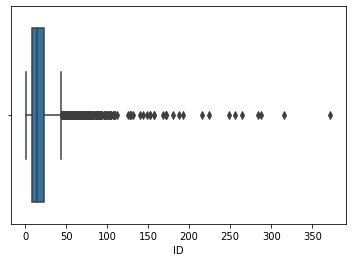

In [6]:
ax = sns.boxplot(data=df_grouped, x='ID')

In [7]:
df_1 = df.loc[df['OrderNumber'] ==1]
df_1.to_pickle('matrices_forte_vars/matrix1.pkl')

n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]

for x in n:
    df_x = df.loc[df['OrderNumber'] < (x+1)]
    df_x = df_x.groupby('UebungsID').agg({'ID':'count','Erstloesung': 'sum', 'Schussel': 'sum', 'Erfolg': 'sum', 'Schwierigkeit': 'mean', 'ist_Schulzeit': 'first', 'MehrfachFalsch':'first', 'vorher_abgebrochen':'first', 'y':'first','UserAttribut':'first', 'Fehler':'first', 
'Klassenstufe':'first', 'Jahredabei':'first', 'AnzahlAufgaben':'first', 'Art__GK':'first', 'Art__GR':'first', 'Art__GZ':'first',
       'Art__K':'first', 'Art__LB':'first', 'HA__HA':'first', 'HA__Self':'first', 'HA__nt':'first', 'HA__vt':'first', 'HA__zt':'first',
       'Sex__m':'first', 'Sex__w':'first', 'Testposition__pruefung':'sum', 'Testposition__training':'sum','Testposition__version':'sum', 'OrderNumber':'max', 'steps':'max', 'AbiEltern':'first', 'BedeutungNoten':'first','SchreibenGern':'first', 'Buecher':'first', 'SchreibenLeicht':'first','deutschnote':'first', 'eigSprache':'first','ErstSchrift':'first', 'SpracheMutter':'first', 'LesenGern':'first','SpracheVater':'first', 'LesenLeicht':'first'})

    df_x = df_x.loc[df_x['ID'] ==x]     
    path = 'matrices_forte_vars/matrix'+ str(x) +'.pkl'
    df_x.to_pickle(path)

<AxesSubplot:xlabel='Sentence', ylabel='Count'>

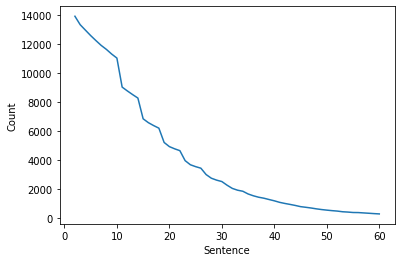

In [8]:
n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
sentence_len= pd.DataFrame(columns=['Sentence', 'Count'])

for x in n:
    path='matrices_forte_vars/matrix'+str(x)+'.pkl'
    infile = open(path,'rb')
    get_length = pickle.load(infile)
    infile.close()
    l = len(get_length)
    sentence_len = sentence_len.append({'Sentence': x, 'Count':l}, ignore_index=True)

sentence_len['Sentence']=sentence_len['Sentence'].astype('int')
sentence_len['Count']=sentence_len['Count'].astype('int')
sns.lineplot(data=sentence_len, x="Sentence", y="Count")